## 1. Importamos las librerias necesarias

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from collections import Counter

## 2. Definimos la clase de PCA

In [2]:
class PCA:

    def initiate(self, data, n_components = 2):
        self.n_samples = data.shape[0]
        self.n_components = n_components
        self.newdata = self.standarization(data)
        covmat = self.covariance_matrix()
        eigenvectors = self.eigenvectors(covmat)
        projmat = self.projection(eigenvectors)
        return projmat

    def standarization(self, data):
        mu = np.mean(data, axis=0)
        sigma = np.std(data, axis=0)
        sigma[sigma == 0] = 1e-12   # evito dividir entre cero
        return (data - mu) / sigma

    def covariance_matrix(self, ddof = 0):
        covmat = np.dot(self.newdata.T, self.newdata) / (self.n_samples - ddof)
        return covmat

    def eigenvectors(self, covmat):
        eigenvalues, eigenvectors = np.linalg.eigh(covmat)
        n_cols = np.argsort(eigenvalues)[::-1][:self.n_components]
        selected_Vectors = eigenvectors[:, n_cols]
        return selected_Vectors

    def projection(self, eigenvectors):
        P = np.dot(self.newdata, eigenvectors)
        return P

## 3. Cargamos los datos con los vectores de los docuementos

In [4]:
doc_vecs = pd.read_csv('archivos/dataset_balanceado_final.csv')

## 4. Separamos los labels de los datos

In [5]:
labels = doc_vecs['Type'].values
df_features = doc_vecs.drop(columns=['Type'])
X = df_features.values

## 5. Instanciamos la clase PCA y reducimos la dimensionalidad

In [6]:
pca = PCA()
X_reducido = pca.initiate(X, n_components=2)

## 6. Graficamos los datos en 2D

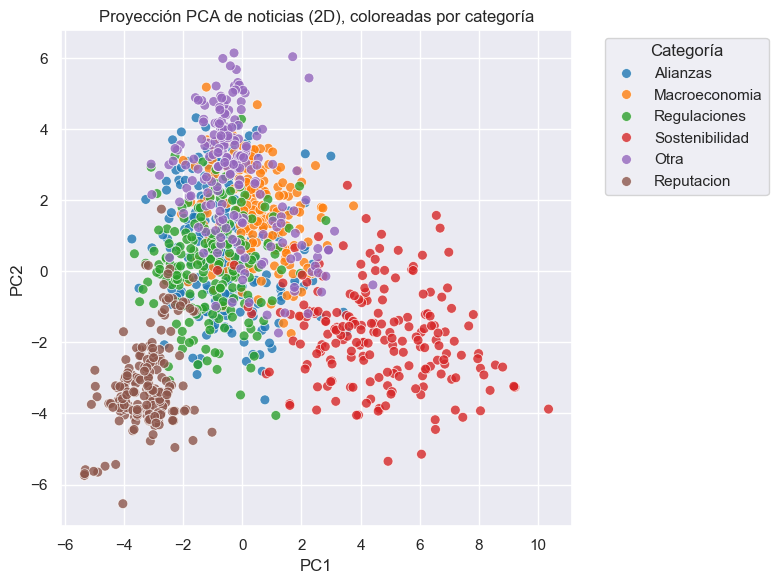

In [7]:
df_plot = pd.DataFrame({
    'PC1': X_reducido[:, 0],
    'PC2': X_reducido[:, 1],
    'categoria': labels
})

sns.set_theme()
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_plot,
    x='PC1',
    y='PC2',
    hue='categoria',
    palette='tab10',
    s=50,
    alpha=0.8
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección PCA de noticias (2D), coloreadas por categoría')
plt.legend(
    title='Categoría',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

## 7. Probar Algoritmo de Clasificación knn

In [ ]:
X = df_features.values
Y = labels

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Codificar las etiquetas categóricas a valores numéricos
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
class_names = label_encoder.classes_

Mejor k por métrica:
Accuracy: k = 43
Precision: k = 46
Recall: k = 43
F1-score: k = 46
ROC AUC: k = 12

Valor de k que saca mejor rendimiento en promedio: k = 43


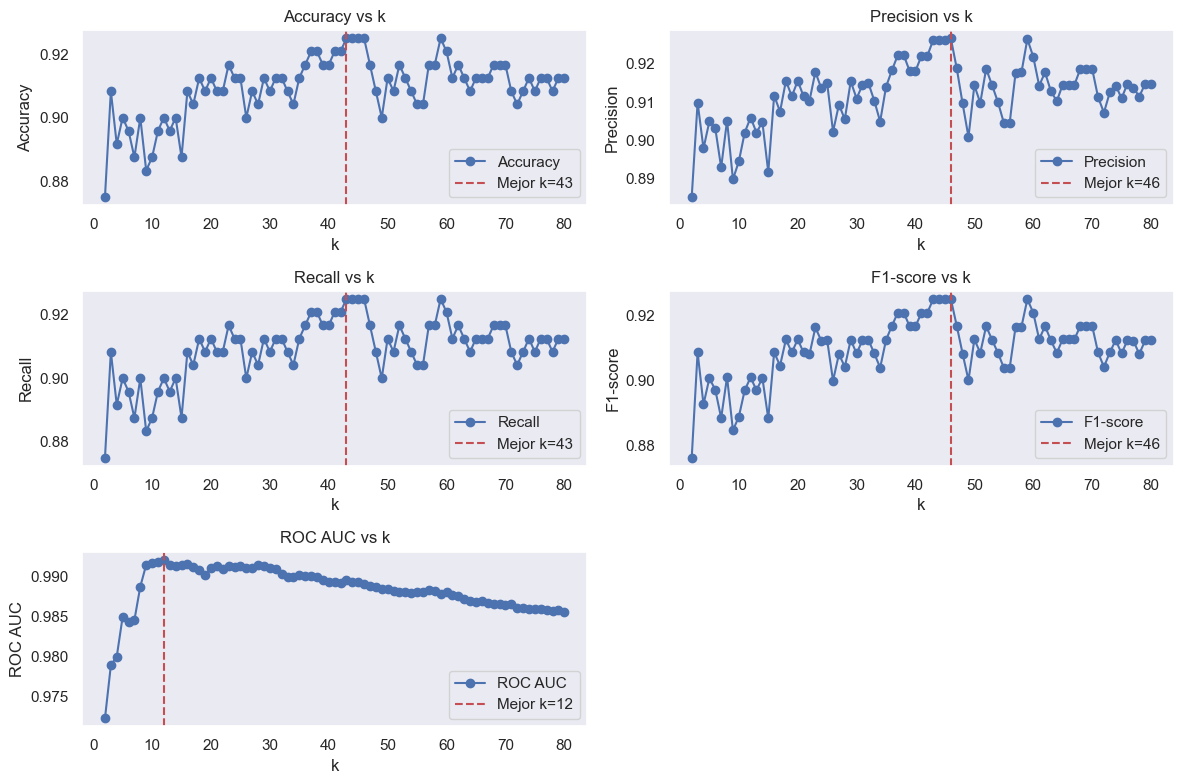

In [9]:

# Listas para almacenar las métricas
k_values = np.arange(2, 81)  # k desde 1 hasta 50
accuracies, precisions, recalls, f1_scores, roc_aucs = [], [], [], [], []

# Diccionario para almacenar el mejor k por métrica
best_k = {}

for k in k_values:
    k_nn_model = KNeighborsClassifier(n_neighbors=k)
    k_nn_model.fit(X_train, y_train)
    y_pred = k_nn_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # roc_auc_score requiere predict_proba
    try:
        roc = roc_auc_score(y_test, k_nn_model.predict_proba(X_test), multi_class='ovr')
    except ValueError:
        roc = np.nan

    # Almacenar métricas
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    roc_aucs.append(roc)

# Encontrar el mejor k por métrica
metrics = {
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1-score": f1_scores,
    "ROC AUC": roc_aucs
}

for metric, values in metrics.items():
    best_k[metric] = k_values[np.nanargmax(values)]  # Ignora NaN si existen

# Calcular el k más frecuente entre las mejores métricas
best_k_list = list(best_k.values())
most_common_k = Counter(best_k_list).most_common(1)[0][0]

# Imprimir resultados
print("Mejor k por métrica:")
for metric, k in best_k.items():
    print(f"{metric}: k = {k}")

print(f"\nValor de k que saca mejor rendimiento en promedio: k = {most_common_k}")

# Graficar cada métrica
plt.figure(figsize=(12, 8))
for i, (metric, values) in enumerate(metrics.items(), 1):
    plt.subplot(3, 2, i)
    plt.plot(k_values, values, marker='o', linestyle='-', label=metric)
    plt.axvline(best_k[metric], color='r', linestyle='--', label=f"Mejor k={best_k[metric]}")
    plt.xlabel("k")
    plt.ylabel(metric)
    plt.title(f"{metric} vs k")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()



In [10]:

k=44

# Crear el modelo k-NN
k_nn_model = KNeighborsClassifier(n_neighbors=k)

# Entrenamiento del modelo
k_nn_model.fit(X_train, y_train)


y_pred = k_nn_model.predict(X_test)

## 8. Imprimir las métricas


Métricas de rendimiento:

Muestra de prueba analizadas: 240
Exactitud (Accuracy)    : 0.925
Precisión (Precision)   : 0.9261879297483134
Sensibilidad (Recall)   : 0.925
Puntuación F1 (F1 Score): 0.925114581864631
ROC AUC                 : 0.9893603773798457


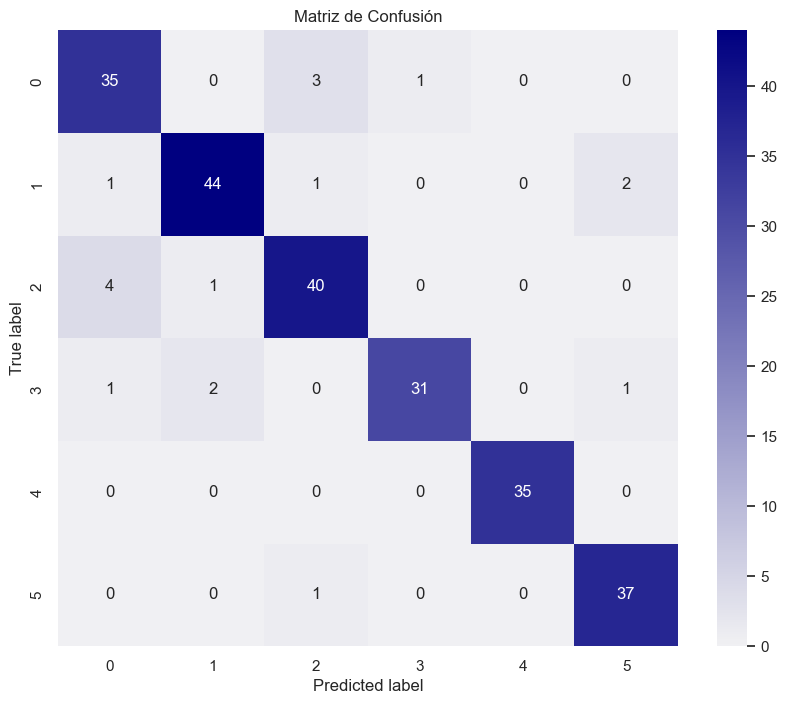

'\n\ndisp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)\ndisp.plot(cmap="plasma")\n\nplt.xlabel(\'Predicted label\')\nplt.ylabel(\'True label\')\nplt.title("Matriz de Confusión")\nplt.show()\n\n# Visualizar la matriz de confusión\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)\nconf_matrix = confusion_matrix(y_test, y_pred)\n\nplt.figure(figsize=(10, 8))\nsns.heatmap(conf_matrix, annot=True, fmt=\'d\', cmap=\'YlGnBu\',\n            xticklabels=np.arange(len(class_names)),\n            yticklabels=np.arange(len(class_names)))\nplt.xlabel(\'Predicted label\')\nplt.ylabel(\'True label\')\nplt.title(\'Matriz de Confusión\')\nplt.show()\n'

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, k_nn_model.predict_proba(X_test), multi_class='ovr')

conf_matrix = confusion_matrix(y_test, y_pred)


# Imprimir las métricas
print("\nMétricas de rendimiento:\n")
print("Muestra de prueba analizadas:", len(X_test))
print("Exactitud (Accuracy)    :", accuracy)
print("Precisión (Precision)   :", precision)
print("Sensibilidad (Recall)   :", recall)
print("Puntuación F1 (F1 Score):", f1)
print("ROC AUC                 :", roc_auc)
#print("Etiquetas de clase en orden:", etiquetas)

# Despliega la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
cmap = sns.light_palette("navy", as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap,
            xticklabels=np.arange(len(class_names)),
            yticklabels=np.arange(len(class_names)))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Matriz de Confusión')
plt.show()
